In [2]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import os

In [3]:
all_025_head_accs = pkl.load(open('/data/jxf/probes/llama_7B_tqa_mc2_all_025_head_accs.pkl', 'rb'))
all_050_head_accs = pkl.load(open('/data/jxf/probes/llama_7B_tqa_mc2_all_050_head_accs.pkl', 'rb'))
all_075_head_accs = pkl.load(open('/data/jxf/probes/llama_7B_tqa_mc2_all_075_head_accs.pkl', 'rb'))
all_100_head_accs = pkl.load(open('/data/jxf/probes/llama_7B_tqa_mc2_all_100_head_accs.pkl', 'rb'))
cut05_head_accs = pkl.load(open('/data/jxf/probes/llama_7B_tqa_mc2_cut05_head_accs.pkl', 'rb'))
cutrandom_head_accs = pkl.load(open('/data/jxf/probes/llama_7B_tqa_mc2_cutrandom_head_accs.pkl', 'rb'))
stimulus_0_head_accs = pkl.load(open('/data/jxf/probes/llama_7B_tqa_mc2_stimulus_0_head_accs.pkl', 'rb'))
stimulus_3_head_accs = pkl.load(open('/data/jxf/probes/llama_7B_tqa_mc2_stimulus_3_head_accs.pkl', 'rb'))
stimulus_6_head_accs = pkl.load(open('/data/jxf/probes/llama_7B_tqa_mc2_stimulus_6_head_accs.pkl', 'rb'))
stimulus_ans_mean_head_accs = pkl.load(open('/data/jxf/probes/llama_7B_tqa_mc2_stimulus_ans_mean_head_accs.pkl', 'rb'))
stimulus_mean_head_accs = pkl.load(open('/data/jxf/probes/llama_7B_tqa_mc2_stimulus_mean_head_accs.pkl', 'rb'))
all_ans_mean_head_accs = pkl.load(open('/data/jxf/probes/llama_7B_tqa_mc2_all_ans_mean_head_accs.pkl', 'rb'))
all_mean_head_accs = pkl.load(open('/data/jxf/probes/llama_7B_tqa_mc2_all_mean_head_accs.pkl', 'rb'))
gen_all_100_head_accs = pkl.load(open('/data/jxf/probes/llama_7B_tqa_gen_all_100_head_accs.pkl', 'rb'))


In [7]:
def draw_hotmap(matrix, n=48):
    print('mean_acc:',np.sort(matrix.flatten())[-n:].mean())
    plt.imshow(matrix, cmap='Blues', interpolation='nearest')
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()

In [5]:
def find_max(matrix):


    flat_indices = np.argsort(matrix, axis=None)[::-1]

    # 计算对应的行号和列号
    rows, cols = np.unravel_index(flat_indices, matrix.shape)

    # 获取排序后的值
    sorted_values = matrix[rows, cols]

    return list(zip(rows, cols, sorted_values))

In [6]:
find_max(gen_all_100_head_accs)

[(11, 6, 0.785483870967742),
 (12, 3, 0.7846774193548387),
 (17, 1, 0.7774193548387097),
 (18, 0, 0.7758064516129032),
 (13, 23, 0.7758064516129032),
 (11, 3, 0.7741935483870968),
 (14, 12, 0.7661290322580645),
 (12, 21, 0.7637096774193548),
 (10, 28, 0.7588709677419355),
 (18, 9, 0.7564516129032258),
 (9, 9, 0.7556451612903226),
 (20, 30, 0.7556451612903226),
 (11, 8, 0.7548387096774194),
 (13, 16, 0.7540322580645161),
 (16, 13, 0.7524193548387097),
 (10, 12, 0.7524193548387097),
 (8, 17, 0.75),
 (16, 11, 0.7491935483870967),
 (15, 20, 0.7483870967741936),
 (13, 22, 0.7483870967741936),
 (13, 1, 0.7475806451612903),
 (11, 25, 0.7475806451612903),
 (31, 6, 0.7467741935483871),
 (19, 6, 0.7459677419354839),
 (12, 14, 0.7451612903225806),
 (15, 21, 0.7435483870967742),
 (11, 16, 0.742741935483871),
 (21, 29, 0.742741935483871),
 (17, 29, 0.742741935483871),
 (13, 10, 0.742741935483871),
 (18, 17, 0.7419354838709677),
 (16, 25, 0.7411290322580645),
 (11, 15, 0.7411290322580645),
 (15, 11,

In [7]:
# draw_hotmap(gen_all_100_head_accs)

mean_acc: 0.7653729838709676


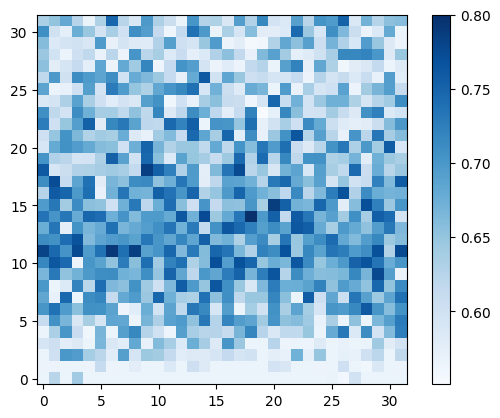

In [8]:
draw_hotmap(all_100_head_accs)

mean_acc: 0.7134912634408602


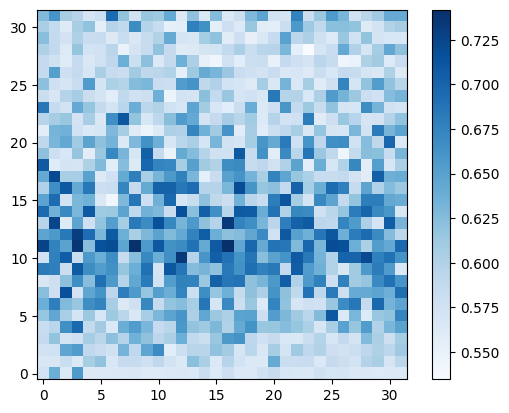

In [9]:
draw_hotmap(all_075_head_accs)

mean_acc: 0.6948924731182795


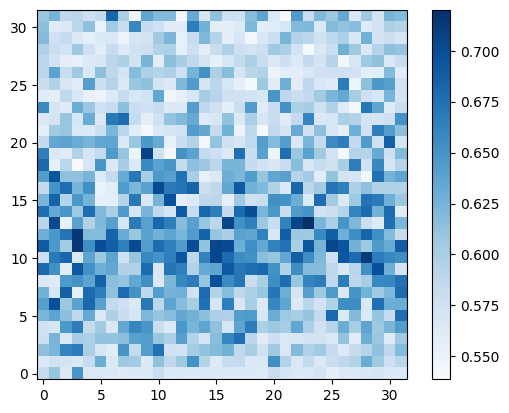

In [10]:
draw_hotmap(all_050_head_accs)

mean_acc: 0.6613407258064515


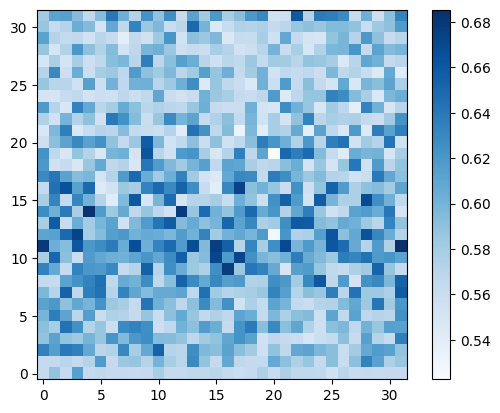

In [11]:
draw_hotmap(all_025_head_accs)

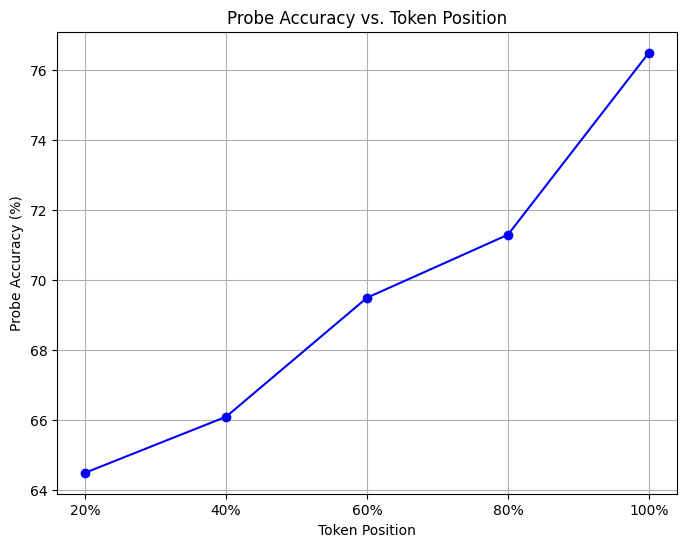

In [14]:
# Data for plotting, now with English labels
accuracy = [64.5, 66.1, 69.5, 71.3, 76.5]
token_positions = ['20%', '40%', '60%', '80%', '100%']

# Creating the plot with English labels
plt.figure(figsize=(8, 6))
plt.plot(token_positions, accuracy, marker='o', linestyle='-', color='b')

# Adding labels and title in English
plt.xlabel('Token Position')
plt.ylabel('Probe Accuracy (%)')
plt.title('Probe Accuracy vs. Token Position')

# Display the plot
plt.grid(True)
plt.savefig('probe_acc_position.pdf', format='pdf')
plt.show()
